1. Import required packages.
2. Load the data file


3 pts.

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt


In [7]:
diamond_train = pd.read_csv('diamonds_train.csv')

4. Check the first 5 rows of data
5. Check for missing values using a heatmap.
6. Check data distribution by diamond shape using a histogram (bar graph).


2 pts.



In [8]:
diamond_train.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [9]:
diamond_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

<AxesSubplot:>

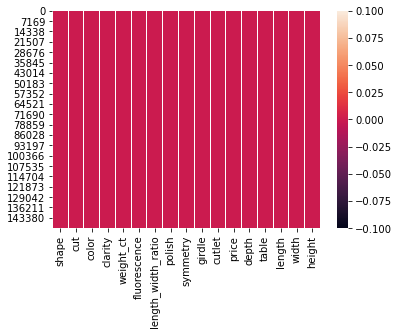

In [10]:
sns.heatmap(diamond_train.isnull(), cbar=True)

<AxesSubplot:>

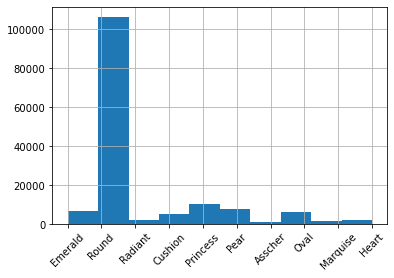

In [11]:
diamond_train['shape'].hist(xrot=45.0)

In [12]:
diamond_train['shape'].unique()

array(['Emerald', 'Round', 'Radiant', 'Cushion', 'Princess', 'Pear',
       'Asscher', 'Oval', 'Marquise', 'Heart'], dtype=object)

In [13]:
diamond_shapes_to_remove = ['Emerald', 'Radiant', 'Cushion', 'Princess', 'Pear',
       'Asscher', 'Oval', 'Marquise', 'Heart']

diamond_train.drop(diamond_train[diamond_train['shape'].isin(diamond_shapes_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

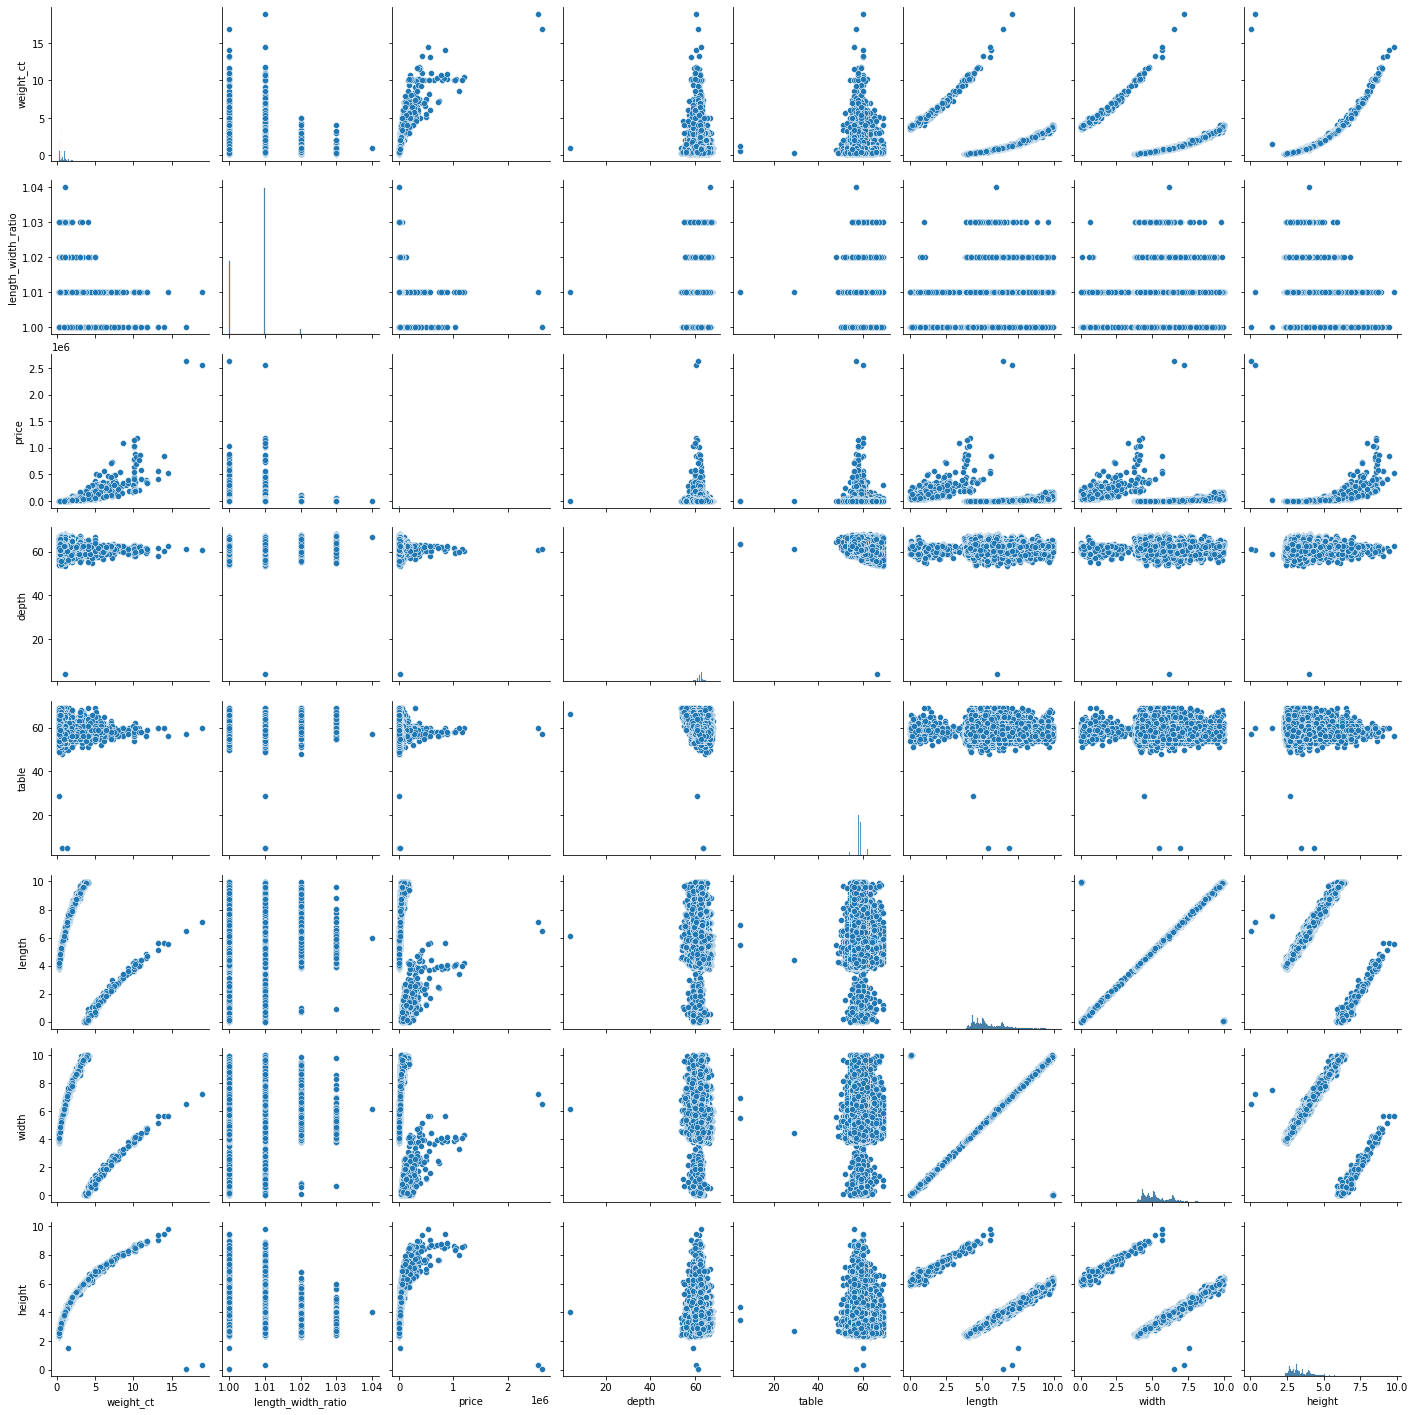

In [14]:
sns.pairplot(diamond_train)

Comments:
Height and Weight stand out as the predictors that have a clear linear relationship with the target 'Price'.
Assuming you get rid of the outliers on a lot of the variables such as anything with a weight over 10, homoscedascisity is present in most of the predictors. Some of the largest must remove outliers are any diamond with a table less than 40.

There is however multicolinearity in some of the predictors with height and width with weight_count so I would have to consult with a SME in order to decide whether or not I should remove this as a predictor. 


9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [15]:
diamond_train.drop(diamond_train[diamond_train['table'] < 40 ].index, inplace=True)
diamond_train.drop(diamond_train[diamond_train['weight_ct'] > 10 ].index, inplace=True)
diamond_train.drop(diamond_train[diamond_train['depth'] < 20 ].index, inplace=True)
diamond_train.drop(diamond_train[diamond_train['height'] < 2 ].index, inplace=True)




In [16]:
imputed = diamond_train.fillna(diamond_train.mean())


In [17]:
imputed.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,106210.000000,106210.000000,1.062100e+05,106210.000000,106210.000000,106210.000000,106210.000000,106210.000000
mean,0.737952,1.006993,4.993117e+03,62.180250,57.953471,5.419853,5.414876,3.411017
std,0.624577,0.005141,1.497848e+04,1.510998,2.037312,1.184887,1.187391,0.751958
min,0.230000,1.000000,2.820000e+02,53.500000,48.000000,0.000000,0.000000,2.310000
25%,0.370000,1.000000,7.100000e+02,61.400000,56.000000,4.570000,4.560000,2.850000
50%,0.510000,1.010000,1.386500e+03,62.300000,58.000000,5.130000,5.120000,3.190000
75%,1.000000,1.010000,4.572750e+03,62.800000,59.000000,6.210000,6.220000,3.920000
max,10.000000,1.040000,1.097903e+06,67.800000,69.000000,9.990000,9.990000,8.520000


In [18]:
imputed.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [19]:
predictors = ['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet',
       'depth', 'table', 'length', 'width', 'height']

In [20]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['price']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
diamond_price = LinearRegression()

diamond_price.fit(train_X, train_y)

LinearRegression()

In [22]:
X.columns

Index(['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width',
       'height', 'cut_Good', 'cut_Ideal', 'cut_IdealInfo',
       ...
       'girdle_Very Thin to Thin Faceted', 'girdle_Very Thin to Very Thick',
       'girdle_Very Thin to Very Thick Faceted',
       'girdle_Very Thin to Very Thin', 'cutlet_Medium', 'cutlet_None',
       'cutlet_Pointed', 'cutlet_Slightly Large', 'cutlet_Small',
       'cutlet_Very Small'],
      dtype='object', length=108)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score  

In [24]:
pred_y = diamond_price.predict(valid_X)

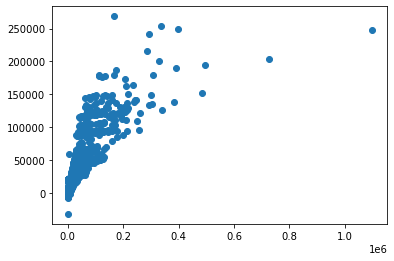

In [25]:
plt.scatter(valid_y, pred_y)

In [26]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.7093849647193291
MAE:  2152.731263376787
RMSE:  8735.472713133626
Max error:  850057.8971204042


In [27]:
# This a solid model with the exception of the few outliers with massive Error it would be useful to practicioners.